In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

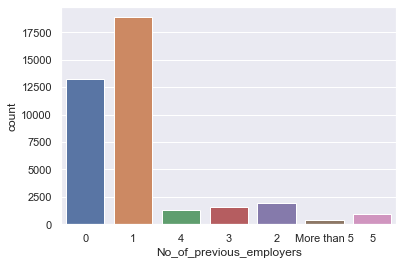

In [5]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="No_of_previous_employers", data=train)

train.No_of_previous_employers.value_counts()

In [ ]:
#Settle Number of Previous Employers
train['More_than_5'] = 0
train.loc[train['No_of_previous_employers'] == 'More_than_5','More_than_5'] = 1

#Now for Test
test['More_than_5'] = 0
test.loc[test['No_of_previous_employers'] == 'More_than_5','More_than_5'] = 1

In [ ]:
train = train.replace({'More than 5':'5'})

#Test
test = test.replace({'More than 5':'5'})

In [ ]:
train[(train['No_of_previous_employers'] == '5') & (train['More_than_5'] == 0)].head()

In [6]:
train.loc[train['Qualification'].isnull(), 'Qualification'] = 'Special'

#test
test.loc[test['Qualification'].isnull(), 'Qualification'] = 'Special'

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    
dummyEncode(train).head(5)

In [ ]:
#x_tested = test.drop('EmployeeNo',axis=1)
#dummyEncode(x_tested).head(5)

In [ ]:
#split the Data into Train, Test and Validate

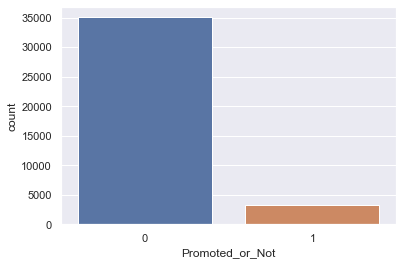

In [7]:
train['Promoted_or_Not'].value_counts()

sns.set(style="darkgrid")
ax = sns.countplot(x="Promoted_or_Not", data=train)

In [8]:
train.head(5)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [ ]:
train.Last_performance_score = train.Last_performance_score.astype(int)
train.dtypes

In [ ]:
x_tested.Last_performance_score = x_tested.Last_performance_score.astype(int)
x_tested.dtypes

In [9]:
x_tested = test.drop('EmployeeNo',axis=1)

In [10]:
#Lets reduce the scale of Year_of_recruitment and Year_of_birth

train['Age'] = 2019 - train['Year_of_birth']
train['work_duration'] = 2019 - train['Year_of_recruitment']

x_tested['Age'] = 2019 - x_tested['Year_of_birth']
x_tested['work_duration'] = 2019 - x_tested['Year_of_recruitment']

In [11]:
#Split the train dataset into Train, Validate and Test
from sklearn.model_selection import train_test_split

X = train.drop(['Promoted_or_Not','Year_of_birth','Year_of_recruitment','EmployeeNo'],axis = 1)
y = train['Promoted_or_Not']


from sklearn.utils import resample
X,y = resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2,random_state=42)

#60% Train dataset, 20% test set

In [ ]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

is_string_dtype(X_train['State_Of_Origin'])

#X_test['State_Of_Origin'].dtypes

In [ ]:
train.columns

In [12]:
#Lets do mean encoding for Qualification,
def meanEncode(df,lists,target):
    for col in lists:
        means = train.groupby(col)[target].mean()
        df[col] = df[col].map(means)
    return df

columns = ['Division','Qualification','Gender','Channel_of_Recruitment','Trainings_Attended',
          'State_Of_Origin','Foreign_schooled','Marital_Status','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement',
           'No_of_previous_employers','Previous_Award','Targets_met']
meanEncode(X_train,columns,'Promoted_or_Not').head(5)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Age,work_duration
34782,0.055935,0.081906,0.082701,0.083179,0.072989,12.5,0.169181,0.075965,50,0.075646,0.084869,0.084972,0.08451,0.085338,0.085546,30,7
16219,0.056925,0.081906,0.082701,0.084280,0.087699,7.5,0.038446,0.075965,44,0.074718,0.084869,0.084972,0.08451,0.085338,0.085546,34,9
12089,0.088298,0.048839,0.089048,0.084280,0.087699,10.0,0.169181,0.075965,50,0.085959,0.084869,0.084972,0.08451,0.085338,0.085546,27,6
24038,0.107431,0.081906,0.082701,0.084280,0.087699,7.5,0.038446,0.075965,73,0.074718,0.084869,0.084972,0.08451,0.085338,0.082354,28,8
12209,0.071911,0.081906,0.082701,0.084280,0.087699,7.5,0.169181,0.075965,37,0.094726,0.084869,0.081709,0.08451,0.085338,0.085546,42,6


In [ ]:
#X_train[['Age','Year_of_recruitment']] = X_trained[['Age','Year_of_recruitment','Last_performance_score','Training_score_average',]]

In [13]:
x_tested = x_tested.drop(['Year_of_birth','Year_of_recruitment'],axis=1)
x_tested.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Age,work_duration
0,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,7.5,0,0,65,FCT,Yes,Married,No,No,1,43,2
1,Information Technology and Solution Support,Special,Male,Direct Internal process,2,0.0,0,0,69,OGUN,Yes,Married,No,No,1,28,1
2,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,7.5,0,0,76,KANO,Yes,Married,No,No,1,35,7
3,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,2.5,0,0,52,RIVERS,No,Single,No,No,1,35,10
4,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,7.5,1,0,69,FCT,Yes,Married,No,No,0,36,5


In [14]:
#Lets build Machine Learning - Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(solver='lbfgs',max_iter=1000,C=0.001,class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#train error
predict_train = lr.predict(X_train)

f1_train = f1_score(y_train,predict_train,average='micro')
print("TRAIN_RMSE: %f" % (f1_train))

TRAIN_RMSE: 0.665438


In [ ]:
#test error
predict_test = lr.predict(X_test)

f1_test = f1_score(y_test,predict_test,average='micro')
print("TEST_RMSE: %f" % (f1_test))

In [ ]:
#test error
predict_val = lr.predict(X_val)

f1_val = f1_score(y_val,predict_val,average='micro')
print("VAL_RMSE: %f" % (f1_val))

In [ ]:
#Random Forests

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=16, n_jobs=-1)

rf.fit(X_train,y_train)

#Lets use Cross Validation
#from sklearn.model_selection import cross_validate

In [ ]:
#train error
predict_rf_train = rf.predict(X_train)

f1_rf_train = f1_score(y_train,predict_rf_train,average='micro')
print("TRAIN_RMSE: %f" % (f1_rf_train))

In [ ]:
#test error
predict_rf_test = rf.predict(X_test)

f1_rf_test = f1_score(y_test,predict_rf_test,average='micro')
print("TEST_RMSE: %f" % (f1_rf_test))

In [ ]:
rf.fit(X,y)

In [ ]:
#test error
predict_rf_val = rf.predict(X_val)

f1_rf_val = f1_score(y_val,predict_rf_val,average='micro')
print("VAL_RMSE: %f" % (f1_rf_val))

In [ ]:
#lets Build XGboost trees.

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=6,max_depth=11,random_state=42,subsample=1)


#Now Lets Cross-Validate
cv = cross_validate(gb,X,y,scoring=('f1_micro'),cv=5)
cv['test_score']

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(lr,X,y,scoring=('f1_micro'),cv=5)
cv.keys()

In [ ]:
#lets use xgboost

import xgboost as xgb
#Learning rate = 0.05, 1000 rounds, max depth = 3-5, subsample = 0.8-1.0, colsample_bytree = 0.3-0.8, lambda = 0-5
xgbd = xgb.XGBClassifier(
             learning_rate= 0.05,
             max_depth= 5,
            n_estimators = 1800,n_jobs=-1,subsample = 1,colsample_bytree = 1,reg_lambda=3,reg_alpha=0.8)

In [ ]:
xgbd.fit(X_train,y_train)

In [ ]:
#train error
predict_xgbd_train = xgbd.predict(X_train)

f1_xgbd_train = f1_score(y_train,predict_xgbd_train,average='micro')
print("TRAIN_RMSE: %f" % (f1_xgbd_train))

In [ ]:
#test error
predict_xgbd_test = xgbd.predict(X_test)

f1_xgbd_test = f1_score(y_test,predict_xgbd_test,average='micro')
print("TEST_RMSE: %f" % (f1_xgbd_test))

In [ ]:
xgbd.fit(X,y)

In [ ]:
#Test on Dataset
#x_tested = resample(x_tested)
predictions = xgbd.predict(x_tested)

In [ ]:
#save as Dataframe
final = {'EmployeeNo':test['EmployeeNo'],'Promoted_or_Not':predictions}
final = pd.DataFrame(final)

final.to_csv('new_submission.csv',index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(xgb, ax=ax)

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameters = {'reg_alpha':[18,20,22],'reg_lambda':[14,16,17]}
parameters = {'reg_alpha':[6,8,9],'reg_lambda':[6,8,9]}
clf = GridSearchCV(xgb,parameters,scoring='f1_micro',n_jobs=-1,cv=3)
clf.fit(X,y)

In [ ]:
clf.cv_results_.keys()

In [ ]:
clf.cv_results_['split1_test_score']

In [ ]:
#test error
predict_clf_test = clf.predict(X_test)

f1_clf_test = f1_score(y_test,predict_clf_test,average='micro')
print("TEST_RMSE: %f" % (f1_clf_test))

In [ ]:
X.head()

In [ ]:
x_tested.shape

In [ ]:
X_cc.shape

In [ ]:
x_tested.head()

In [ ]:
xgb.get_booster().get_score(importance_type="weight")

#from xgboost import plot_importance
#fig, ax = plt.subplots(figsize=(15, 15))
#plot_importance(xgb, ax=ax)
#plt.show()

In [ ]:
#Lets Build Bayes Optimization

import xgboost as xgb
df_DM = xgb.DMatrix(data=X_train, label=y_train)

from bayes_opt import BayesianOptimization

def xgb_evaluate(max_depth, lambd, colsample_bytree,subsample):
        params1 = {'objective': 'binary:logistic',
                  'max_depth': int(max_depth),
                  'learning_rate': 0.1,
                  'lambda': lambd,
                   'subsample': subsample,
                  'colsample_bytree': colsample_bytree,
                  'n_jobs': 4}
        # Used around 1000 boosting rounds in the full model
        cv_result = xgb.cv(dtrain=df_DM, params=params1, num_boost_round=125, nfold=3,metrics='error',seed=42)    

        # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
        return cv_result['test-error-mean']

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 5), 
                                                 'lambd': (2, 6),
                                                 'colsample_bytree': (0.3, 0.8),
                                                'subsample': (0.8,1)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=10, n_iter=3)

In [ ]:
#extract best parameters from model
params1 = xgb_bo.max['params']
print (params1)
#Converting the max_depth and from float to int
params1['max_depth']= int(params1['max_depth'])

In [ ]:
import xgboost as xgb
df_DM = xgb.DMatrix(data=X_train, label=y_train)

from bayes_opt import BayesianOptimization


#def xgb_evaluate(max_depth, lambd, colsample_bytree,subsample):
params1 = {'objective': 'binary:logistic',
                  'max_depth': 5,
                  'learning_rate': 0.1,
                  'lambda':3,
                   'subsample': 1,
                  'colsample_bytree': 1,
                  'n_jobs': 4}
        # Used around 1000 boosting rounds in the full model
    
cv_result = xgb.cv(dtrain=df_DM, params=params1, num_boost_round=125, nfold=3,metrics='error',seed=42) 

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 5), 
                                                 'lambd': (2, 6),
                                                 'colsample_bytree': (0.3, 0.8),
                                                'subsample': (0.8,1)})